# Task 1: Logistic Regression for Binary Classification

## Library

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

## Load Data

In [58]:
# Load Data
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

data1 = pd.read_csv(os.path.join(DATA_DIR, "churn-bigml-20.csv"))
data2 = pd.read_csv(os.path.join(DATA_DIR, "churn-bigml-80.csv"))

In [59]:
print("churn-bigml-20.csv Data:")
display(data1)
print("churn-bigml-80.csv Data:")
display(data2)

churn-bigml-20.csv Data:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


churn-bigml-80.csv Data:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [60]:
print("churn-bigml-20.csv Data Shape:", data1.shape)
print("churn-bigml-80.csv Data Shape:", data2.shape)

churn-bigml-20.csv Data Shape: (667, 20)
churn-bigml-80.csv Data Shape: (2666, 20)


In [61]:
data = pd.concat([data1, data2], ignore_index=True)

In [62]:
print(data["Churn"].value_counts())

Churn
False    2850
True      483
Name: count, dtype: int64


In [63]:
print(data["Churn"].value_counts(normalize=True) * 100)

Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


## Preprocessing Data

In [64]:
# Preprocessing
data.drop(columns=["State", "Area code"], inplace=True)
data["International plan"] = data["International plan"].map({"No": 0, "Yes": 1})
data["Voice mail plan"] = data["Voice mail plan"].map({"No": 0, "Yes": 1})
data["Churn"] = data["Churn"].astype(int)

## Split Data

In [65]:
# Split Data
X = data.drop(columns=["Churn"])
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Oversampling (Replacing SMOTE)

In [66]:
# Oversampling the minority class (Churn = 1)
churn_1 = X_train[y_train == 1]
y_churn_1 = y_train[y_train == 1]
n_samples = y_train.value_counts()[0]  # Match majority class count
X_train_oversampled = pd.concat([X_train, churn_1.sample(n=n_samples, replace=True, random_state=42)])
y_train_oversampled = pd.concat([y_train, y_churn_1.sample(n=n_samples, replace=True, random_state=42)])

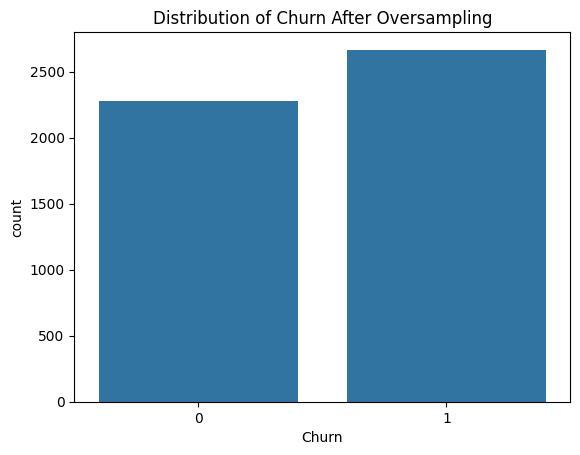

In [67]:
# Show distribution after oversampling
sns.countplot(x=y_train_oversampled)
plt.title("Distribution of Churn After Oversampling")
plt.show()

## Train Model

In [68]:
# Train Model
model = LogisticRegression(max_iter=500, solver="liblinear", random_state=42, class_weight="balanced")
model.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42,
                   solver='liblinear')

## Predict

In [69]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

## Evaluate

In [70]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

## Coefficients & Odds Ratio

In [71]:
# Coefficients & Odds Ratio
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
coefficients["Odds Ratio"] = np.exp(coefficients["Coefficient"])

## ROC Curve

In [72]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

## Result & isualization

In [73]:
# Print Results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)
print("Feature Importance (Odds Ratio):")
display(coefficients.sort_values(by="Odds Ratio", ascending=False))

Accuracy: 0.7736131934032984

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85       571
           1       0.37      0.79      0.50        96

    accuracy                           0.77       667
   macro avg       0.66      0.78      0.68       667
weighted avg       0.87      0.77      0.80       667

Feature Importance (Odds Ratio):


,Feature,Coefficient,Odds Ratio
1,International plan,2.284528,9.821050
16,Customer service calls,0.546018,1.726366
13,Total intl minutes,0.047918,1.049085
15,Total intl charge,0.047260,1.048394
3,Number vmail messages,0.016837,1.016980
6,Total day charge,0.014347,1.014451
4,Total day minutes,0.009554,1.009600
12,Total night charge,0.006765,1.006788
7,Total eve minutes,0.006044,1.006063
10,Total night minutes,0.001995,1.001997


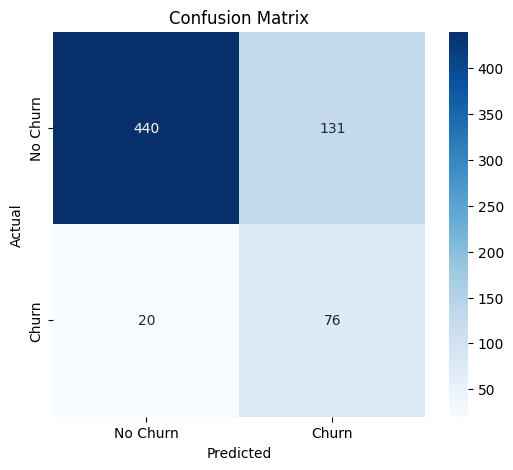

In [74]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

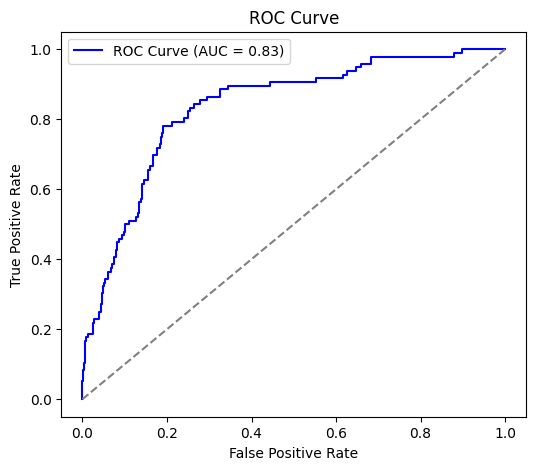

In [75]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

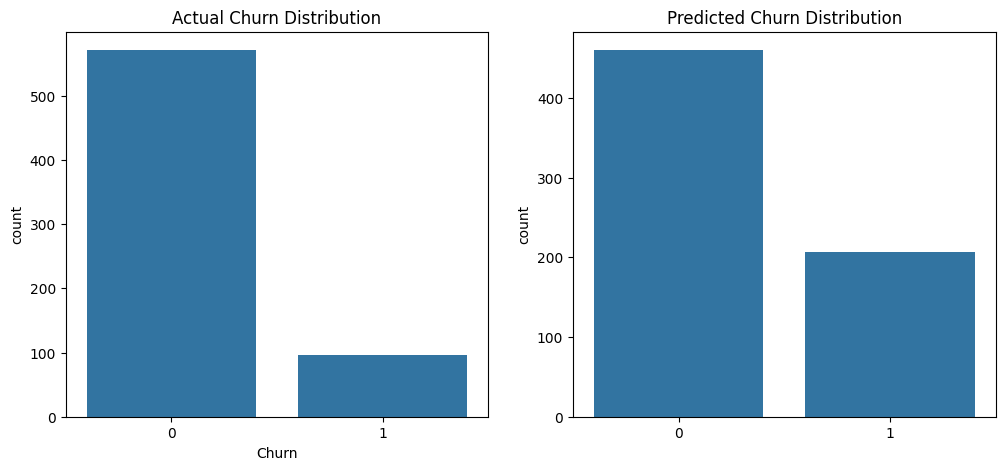

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_test, ax=axes[0])
axes[0].set_title("Actual Churn Distribution")

sns.countplot(x=y_pred, ax=axes[1])
axes[1].set_title("Predicted Churn Distribution")

plt.show()